# Analyse the results

## Define data directory

A top level directory to store all the data for this experiment

In [2]:
dataDirName = '/home/yram0006/phd/chapter_2/workspace/mortality_data/counts_experiment/'

## Function to extract lists

In [1]:
def getLists(d):
    labels = []
    accuracy_scores = []
    balanced_accuracy_scores = []
    average_precision_scores = []
    f1_scores = []
    roc_auc_scores = []

    for label, scores in d.items():
        labels.append(label)
        for key, value in scores.items():
            if key == 'test_accuracy':
                accuracy_scores.append(value)
            if key == 'test_balanced_accuracy':
                balanced_accuracy_scores.append(value)
            if key == 'test_average_precision':
                average_precision_scores.append(value)
            if key == 'test_f1':
                f1_scores.append(value)
            if key == 'test_roc_auc':
                roc_auc_scores.append(value)
    return labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores

In [9]:
import os
import pickle
from pathlib import Path
import pandas as pd


data = []

for n in [500, 1000, 1500, 2000]:
    scoresFile = Path(dataDirName, str(n) + '_samples_icd_vb_0_va_72_lb_0_la_72', 'cv_scores_ts_0_te_7.pickle')
    scoresDict = {}
    with open(Path(scoresFile), 'rb') as fp:
        scoresDict = pickle.load(fp)
    labels, accuracy_scores, balanced_accuracy_scores, average_precision_scores, f1_scores, roc_auc_scores = getLists(scoresDict)
    for i in range(len(labels)):
        for raw_roc_auc_score in roc_auc_scores[i]:
            data.append([labels[i], n, raw_roc_auc_score])
plotDf = pd.DataFrame(data, columns=['Model', 'Count', 'AUROC Score'])

/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yram0006/phd/chapter_2/workspace/mortality/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: Fut

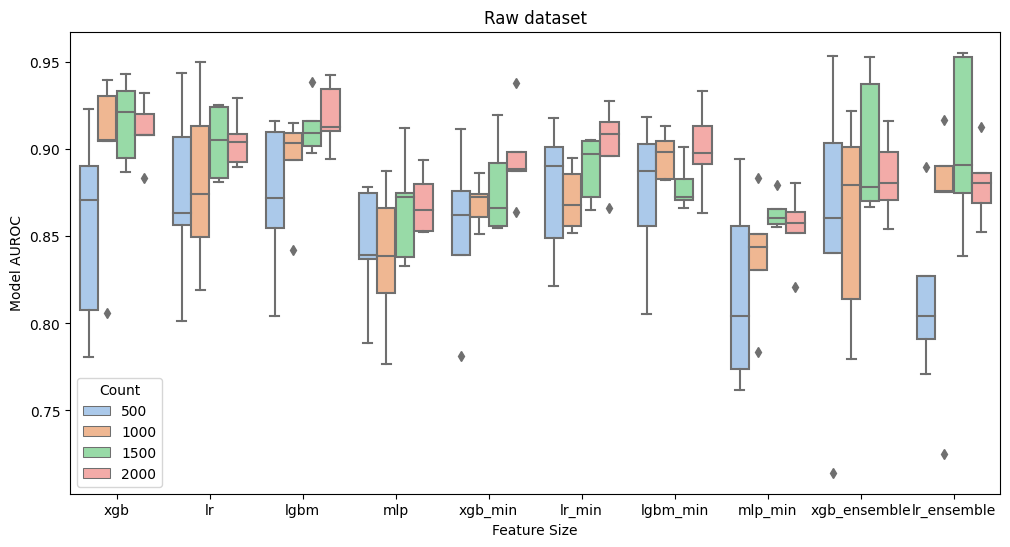

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
# ax = sns.boxplot(data=raw_roc_auc_scores + standardised_roc_auc_scores + rescaled_roc_auc_scores)
# ['raw'] * len(raw_roc_auc_scores) + ['standardised'] * len(raw_roc_auc_scores) + ['rescaled'] * len(raw_roc_auc_scores)
ax = sns.boxplot(data=plotDf, x='Model', y='AUROC Score', hue='Count', palette=sns.color_palette("pastel"))
# ax.set(xticklabels=raw_labels + standardised_labels + rescaled_labels)
ax.set(xlabel='Feature Size')
ax.set(ylabel='Model AUROC')
ax.set_title('Raw dataset')
plt.show()